# Foot Ulcer Area Estimator

## Overview

This experimental tool computes area of manually traced foot ulcer to compare relative change in foot ulcer over a period of time

### Input Requirements
- Foot ulcer must traced on a clean, clear white paper
- Trace must at the center of the paper without any additional marks
- Photo of the tracing must taken on a clear lighting (prefer scanned images) 
- Photo must be supplied in PNG format only

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def draw_image(image):
    fig = plt.figure()
    fig.set_size_inches(10,10)
    plt.imshow(image, cmap='gray')

In [3]:
image_filepath = input("Enter filepath to Foot Ulcer traced Photo (PNG format): ")

Enter filepath to Foot Ulcer traced Photo (PNG format): /Users/lenordmelvix/projects/ulcer_estimator/test_images/ulcer_trace1.png


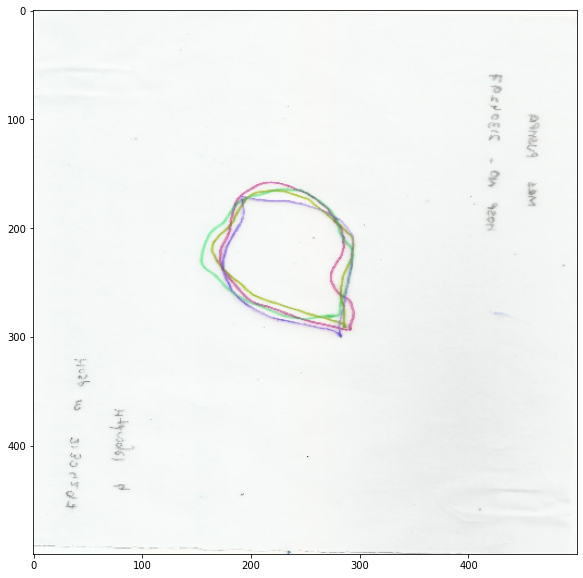

In [4]:
image = cv2.imread(image_filepath, 1)
image = cv2.resize(image, (500,500))
draw_image(image)

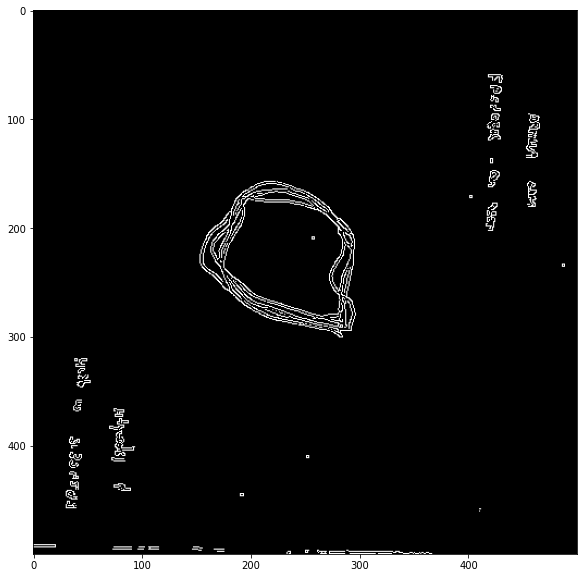

In [5]:
imgray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray,100,200)
draw_image(edges)

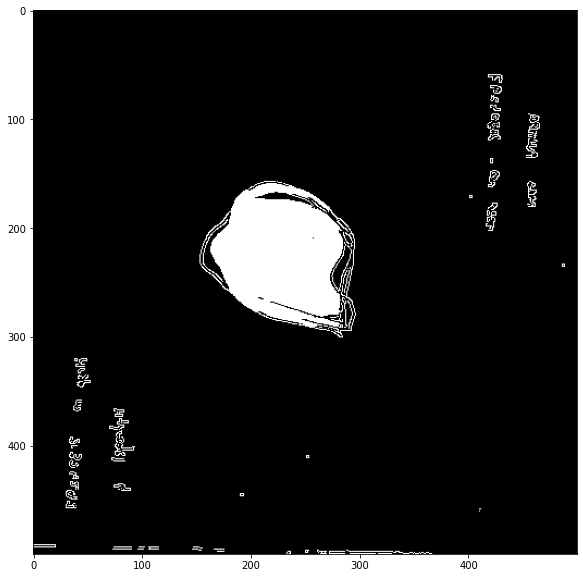

In [6]:
floodfilled_image = edges.copy()
h, w = floodfilled_image.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

seed_point = (250,250)
cv2.floodFill(floodfilled_image, mask, seed_point, 255)
draw_image(floodfilled_image)

In [7]:
ret,thresh = cv2.threshold(floodfilled_image,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
largest_contour = max(contours, key = cv2.contourArea)

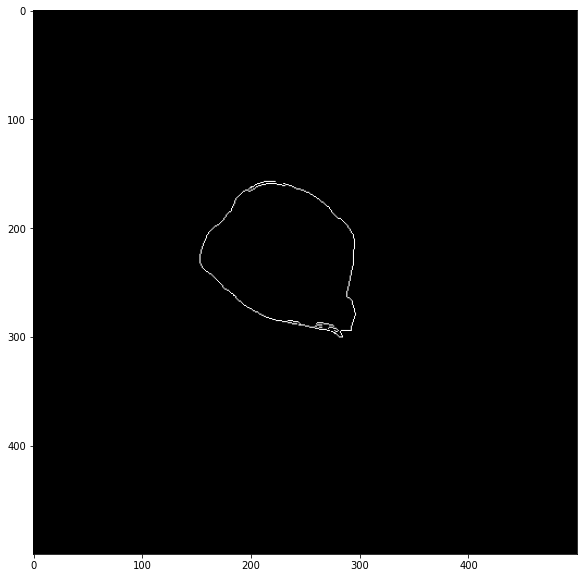

In [8]:
h, w = floodfilled_image.shape[:2]
traced_image = np.zeros((floodfilled_image.shape[:2]), np.uint8)

cv2.drawContours(traced_image,[largest_contour],False,(255,255,255))
draw_image(traced_image)

In [10]:
contour_area = cv2.contourArea(largest_contour)
print('Traced Ulcer area:', contour_area, ' square pixels')

Traced Ulcer area: 13900.5  square pixels
